# SQLAlchemy Joins

## Setup

In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect

In [2]:
engine = create_engine("sqlite:///hawaii2.sqlite", echo=False) #sqlite file downloaded from Jeremy

In [3]:
# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [4]:
# Map Measurement class
M = Base.classes.measurement

In [5]:
# Map Station class
S = Base.classes.station

In [6]:
# create a session
session = Session(engine)

In [7]:
# filter station = "USC00519397"
# query, loop over and print out station.
station = session.query(S).filter(S.station == 'USC00519397').all()
for station in station:
    print("Station: {0}, Latitude: {1}".format(station.station, station.latitude))

Station: USC00519397, Latitude: 21.2716


# Joins

In [8]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [9]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Get a list of column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
session.query(M.station, S.station).all()

[('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00513117'),
 ('USC00519397', 'USC00514830'),
 ('USC00519397', 'USC00517948'),
 ('USC00519397', 'USC00518838'),
 ('USC00519397', 'USC00519523'),
 ('USC00519397', 'USC00519281'),
 ('USC00519397', 'USC00511918'),
 ('USC00519397', 'USC00516128'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00513117'),
 ('USC00519397', 'USC00514830'),
 ('USC00519397', 'USC00517948'),
 ('USC00519397', 'USC00518838'),
 ('USC00519397', 'USC00519523'),
 ('USC00519397', 'USC00519281'),
 ('USC00519397', 'USC00511918'),
 ('USC00519397', 'USC00516128'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00513117'),
 ('USC00519397', 'USC00514830'),
 ('USC00519397', 'USC00517948'),
 ('USC00519397', 'USC00518838'),
 ('USC00519397', 'USC00519523'),
 ('USC00519397', 'USC00519281'),
 ('USC00519397', 'USC00511918'),
 ('USC00519397', 'USC00516128'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00513117'),
 ('USC00519397', 'USC00514830'),
 ('USC0051

In [12]:
# Return all station from M and S belonging to the same station.
# This JOINs the data in the two tables together into a single dataset.
sel = [M.station,S.station,]
same_station = session.query(*sel).filter(M.station == S.station).limit(5).all()

for record in same_station:
    (M_station, S_station) = record
    print(
        f"From Measurement station '{M_station}'"
        f"belongs to the same station '{S_station}'.")

From Measurement station 'USC00519397'belongs to the same station 'USC00519397'.
From Measurement station 'USC00519397'belongs to the same station 'USC00519397'.
From Measurement station 'USC00519397'belongs to the same station 'USC00519397'.
From Measurement station 'USC00519397'belongs to the same station 'USC00519397'.
From Measurement station 'USC00519397'belongs to the same station 'USC00519397'.


In [13]:
# Latest Date
session.query(M.date).order_by(M.date.desc()).first()

('2017-08-23')

In [14]:
engine.execute('SELECT * FROM measurement ORDER BY date DESC LIMIT 12').fetchall()

[(2724, 'USC00519397', '2017-08-23', 0.0, 81.0),
 (7635, 'USC00514830', '2017-08-23', 0.0, 82.0),
 (12187, 'USC00519523', '2017-08-23', 0.08, 82.0),
 (19550, 'USC00516128', '2017-08-23', 0.45, 76.0),
 (2723, 'USC00519397', '2017-08-22', 0.0, 82.0),
 (12186, 'USC00519523', '2017-08-22', 0.0, 82.0),
 (19549, 'USC00516128', '2017-08-22', 0.5, 76.0),
 (2722, 'USC00519397', '2017-08-21', 0.0, 81.0),
 (7634, 'USC00514830', '2017-08-21', 0.02, 79.0),
 (12185, 'USC00519523', '2017-08-21', None, 82.0),
 (19548, 'USC00516128', '2017-08-21', 0.56, 76.0),
 (2721, 'USC00519397', '2017-08-20', 0.0, 81.0)]

In [15]:
# Dependencies
import pandas as pd
import numpy as np
import os
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import datetime
from sqlalchemy import create_engine, inspect, func


# Precipitation Analysis

In [16]:
# Retrieve the last 12 months of precipitation data
prcp=session.query(M.date, M.prcp).filter(M.date > '2016-08-23' ).order_by(M.date).all()
prcp

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [17]:
# Plot the Results
df = pd.DataFrame(prcp, columns=['date', 'precipitation'])
df = df.dropna(axis=0)
df = df.reset_index(drop=True) 
df.head()

,date,precipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,1.22
4,2016-08-24,2.15


In [18]:
df["date"] = pd.to_datetime(df["date"])

In [19]:
print(df.index)

RangeIndex(start=0, stop=2015, step=1)


<IPython.core.display.Javascript object>


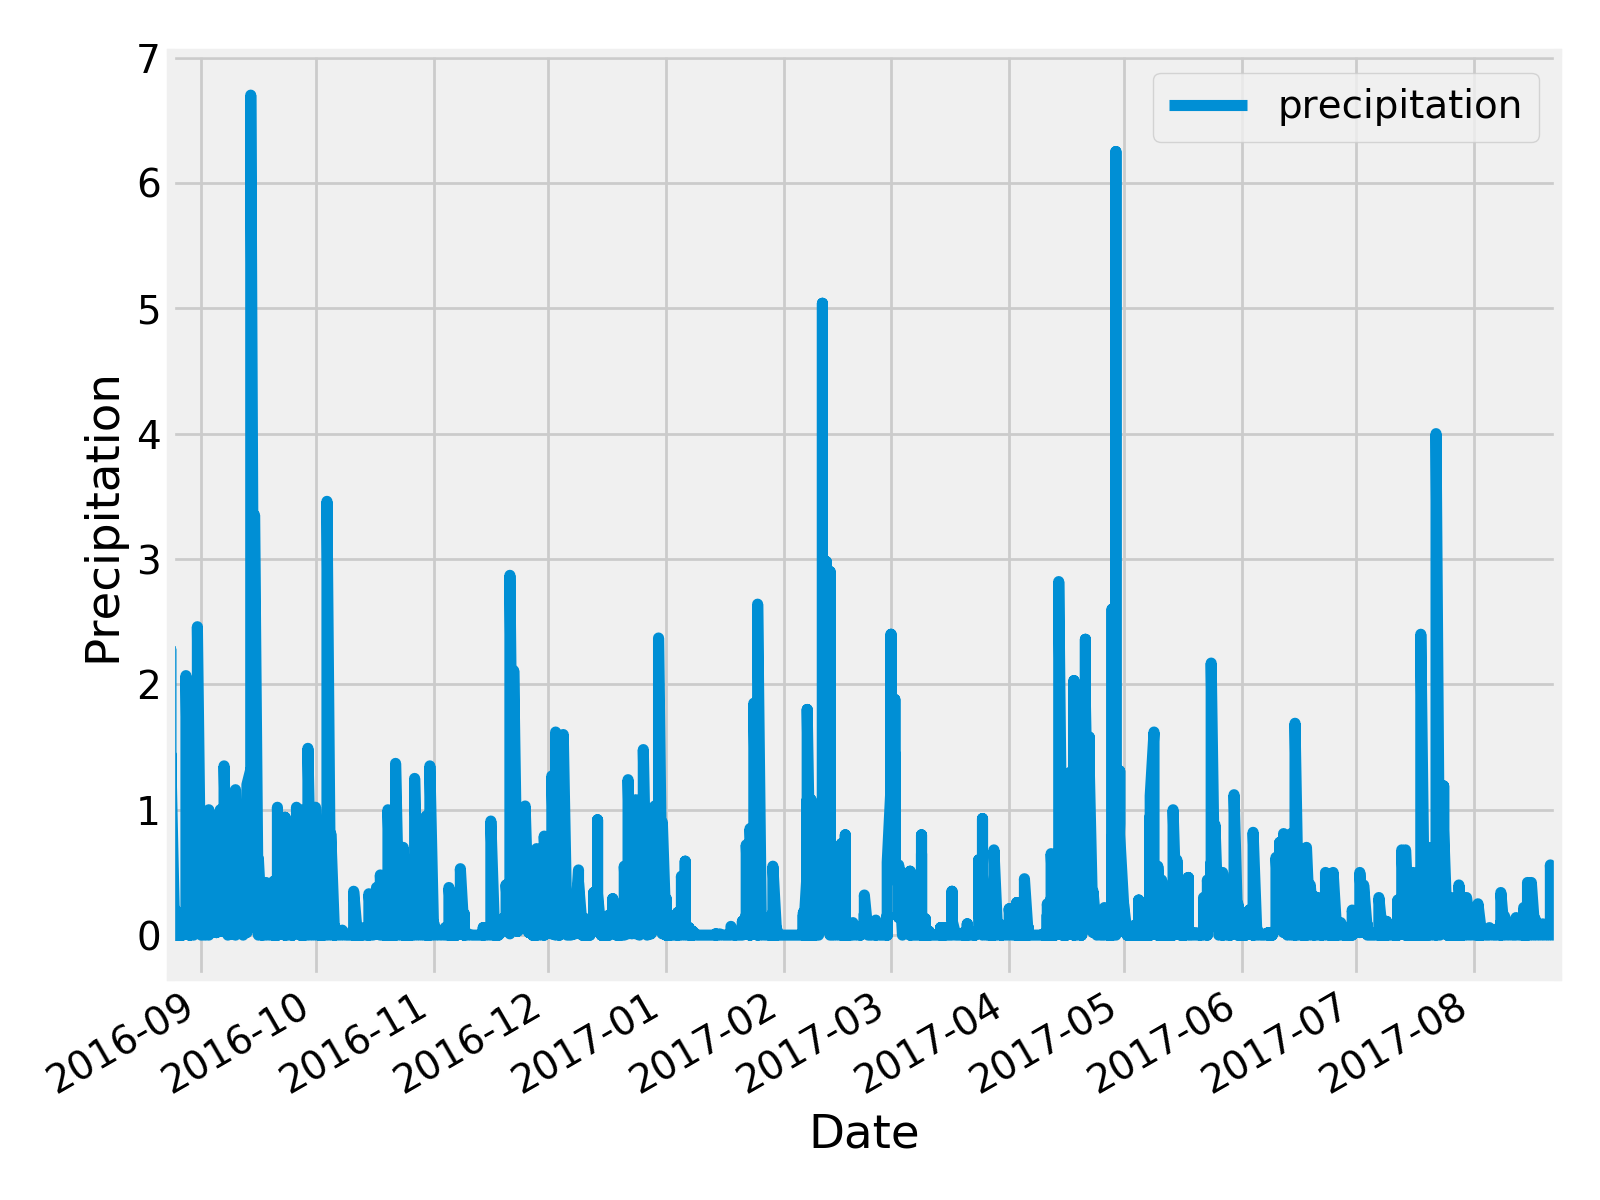

In [20]:
ax=df.set_index('date').plot(figsize=(8,6))
ax.set_ylabel('Precipitation')
ax.set_xlabel('Date')
plt.tight_layout()
plt.show()

In [21]:
#summary statistics for the precipitation data
s_df=df.set_index('date')
s_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [22]:
# count active stations
allstations=session.query(M.station, func.count(M.station)).group_by(M.station).all()
allstations

[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [23]:
# convert to dataframe
station_df = pd.DataFrame(allstations, columns=['Station', 'Count'])
station_df

,Station,Count
0,USC00511918,1979
1,USC00513117,2709
2,USC00514830,2202
3,USC00516128,2612
4,USC00517948,1372
5,USC00518838,511
6,USC00519281,2772
7,USC00519397,2724
8,USC00519523,2669


In [24]:
# sort descending 
station_D_df = station_df.sort_values(['Count'], ascending=[False])
station_D_df

,Station,Count
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


## USC00519281 has the highest number of observations

In [25]:
h_station=session.query(M.tobs).filter( (M.station == 'USC00519281') & (M.date > '2016-08-23') ).all()
h_station

[(77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 (66.0),
 

In [26]:
plot_df=[i[0] for i in h_station]

<IPython.core.display.Javascript object>


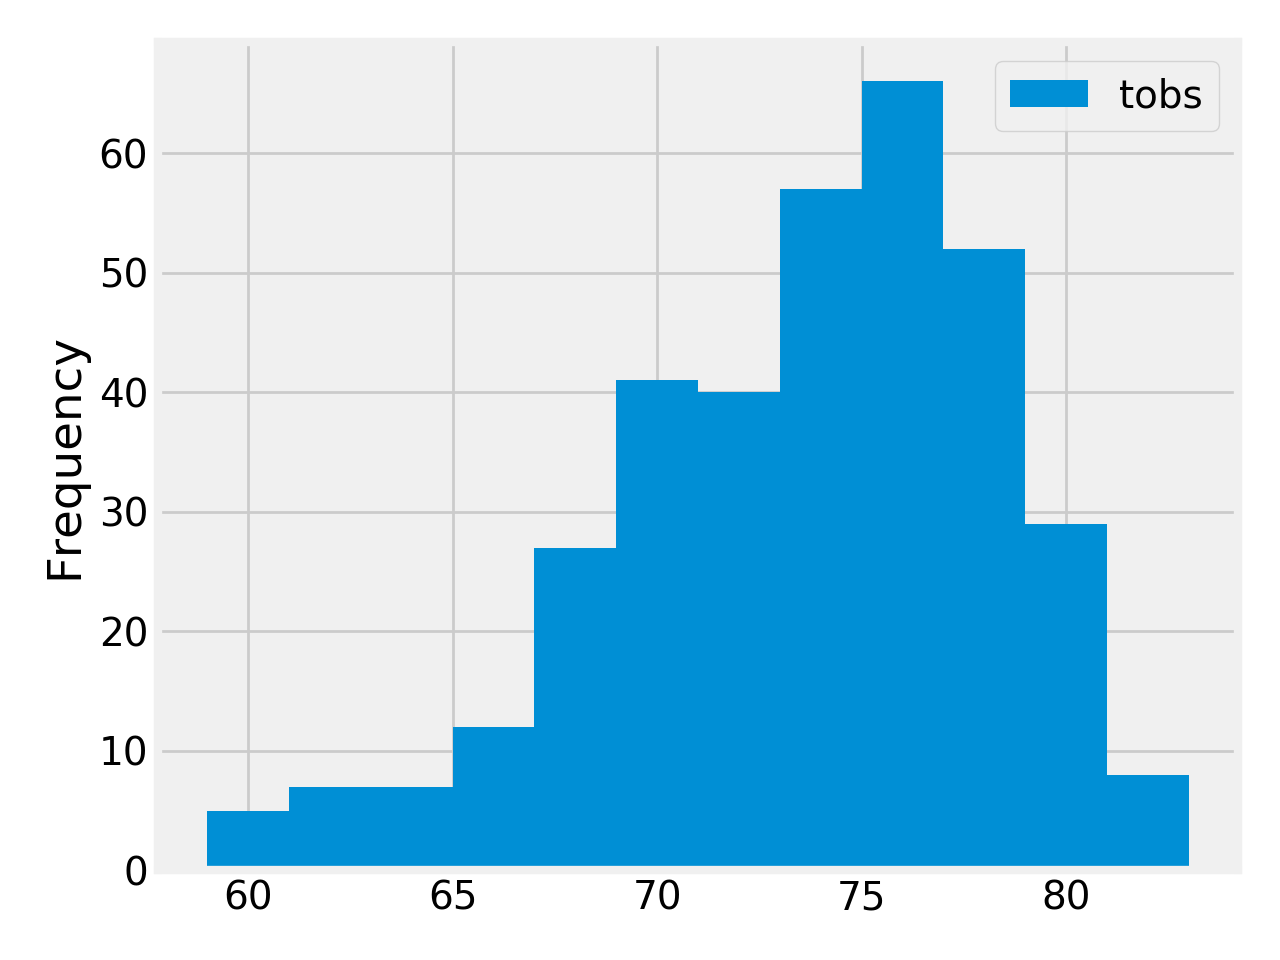

In [27]:
ax_1=pd.Series(plot_df).plot(kind='hist', bins=12)
ax_1.legend(["tobs"])
plt.tight_layout()
plt.show()

# Temperature Analysis

In [28]:
def calc_temps (start_date, end_date):
    temp= session.query(func.avg(M.tobs),func.min(M.tobs), func.max(M.tobs)).filter((M.date >= start_date) & (M.date <= end_date)).all()[0]
    return(temp)

In [29]:
temp=calc_temps('2016-01-01', '2017-01-01')
temp

(74.1317494600432, 56.0, 84.0)

<IPython.core.display.Javascript object>


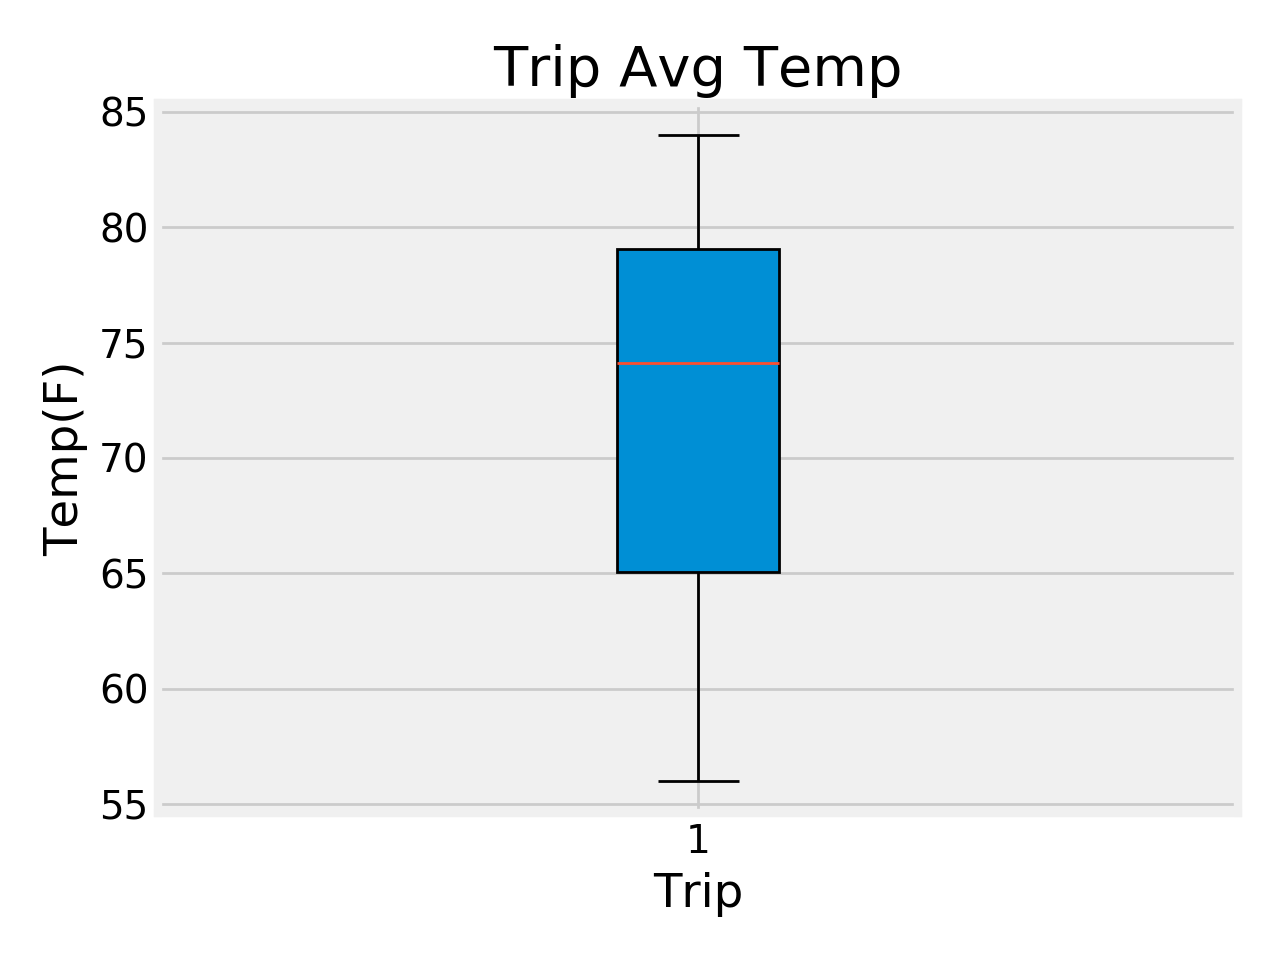

In [30]:
# Load the query into a dataframe, set the index to the date, and plot the ptps
import numpy as np

fig, ax3 = plt.subplots()

x = range(len(temp))
ax3.boxplot(temp, patch_artist=True)
ax3.set_title('Trip Avg Temp')
ax3.set_ylabel('Temp(F)')
ax3.set_xlabel('Trip')
fig.tight_layout()
fig.show()